## Exercise 3: Using the Titanic dataset, train a classifier to predict the survived column

In [42]:
# Import data from the Titanic dataset, downloaded from Kaggle.
# The dataset is split into train and test sets, with the test set not containing the survival
import pandas as pd

# Data is pre-split in a odd way, so we need to load both train and test sets, merge survival column to the 'test' set and then split correctly.
a = pd.read_csv("./datasets/titanic/train.csv")
b = pd.read_csv("./datasets/titanic/test.csv")
c = pd.read_csv("./datasets/titanic/gender_submission.csv")

# Merge the survival column from the train set to the test set
b = pd.merge(b, c, on='PassengerId', how='left')


data = pd.concat([a, b], ignore_index=True)

### Data exploration

In [ ]:
# Data exploration

# I  checked distributions and number of missing values in the dataset using datawrangler in VS Code.
# Various columns have skewed distributions, such as Fare.
# Cabin is mostly missing (>70%), so we will drop it.
# Age has some missing values (20%), may be an important factor for survival rate, so we will impute it.


# Lets drop the passanger name and ticket as it is not useful for our analysis. Also will drop cabin, as it has too many missing values.
data.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)

# Convert dtypes correctly
from pandas.api.types import CategoricalDtype

pclass_order = CategoricalDtype(categories=[3, 2, 1], ordered=True)
data['Pclass'] = data['Pclass'].astype(pclass_order)
data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')
data['Survived'] = data['Survived'].astype('category')

data.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   category
 2   Pclass       1309 non-null   category
 3   Sex          1309 non-null   category
 4   Age          1046 non-null   float64 
 5   SibSp        1309 non-null   int64   
 6   Parch        1309 non-null   int64   
 7   Fare         1308 non-null   float64 
 8   Embarked     1307 non-null   category
dtypes: category(4), float64(2), int64(3)
memory usage: 56.9 KB


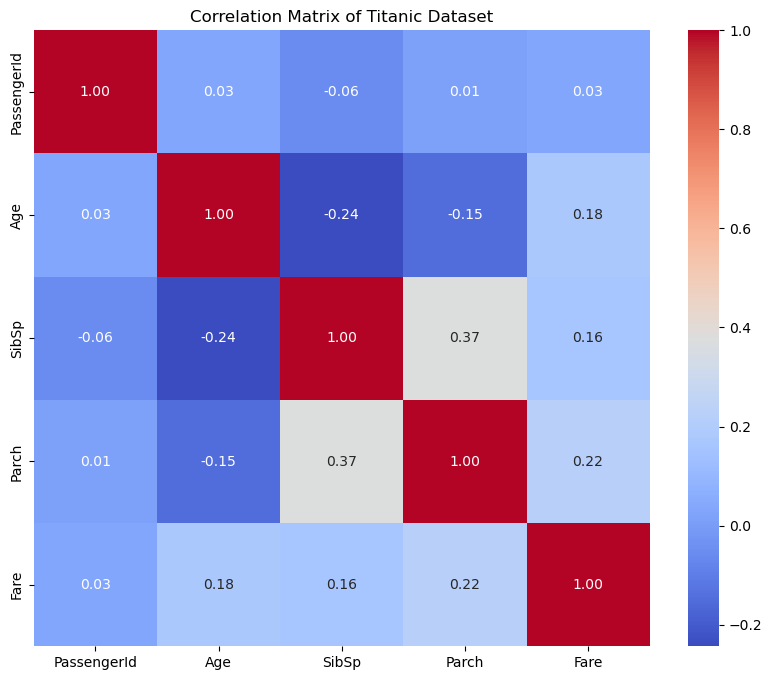

In [44]:
# Plot out correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(method= "pearson", numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()


# Correlation matrix shows that:
# survival has a low-moderate correlation with pclass and fare
# pclass (i.e., passenger class) has a strong negative correlation with age, survival and fare price.

In [ ]:
# Lets investigate correlations between categorical varaibles and survival/age.
from scipy.stats import pointbiserialr

#corr, p_value = pointbiserialr(data["Survived", "Pclass", "Sex", "Embarked"], data["Age", "SibSp", "Parch", "Fare"])
corr, p_value = pointbiserialr(data["Survived"], data["Fare"])


import pingouin as pg
aov - pg.anova(data=data, dv='Survived', between="Pclass")

ModuleNotFoundError: No module named 'pingouin'